In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



In [2]:
train_dir = '/kaggle/input/malware-detection-with-images/DetectionDataset/splittedDataset/train'
val_dir = '/kaggle/input/malware-detection-with-images/DetectionDataset/splittedDataset/val'
test_dir = '/kaggle/input/malware-detection-with-images/DetectionDataset/splittedDataset/test'

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

2024-07-03 17:58:24.297005: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-03 17:58:24.297128: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-03 17:58:24.435627: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [4]:
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [5]:
val_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [6]:
train_generator=train_datagen.flow_from_directory(
     train_dir,
     target_size=(150,150),
     batch_size=32,
     class_mode='binary'
)

Found 3769 images belonging to 2 classes.


In [7]:
val_generator=val_datagen.flow_from_directory(
    val_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 808 images belonging to 2 classes.


In [8]:
test_generator=test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 809 images belonging to 2 classes.


In [9]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
    
])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
model.compile(optimizer=Adam(learning_rate=0.001),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [11]:
history=model.fit(
    train_generator,
    epochs=20,
    validation_data=val_generator
 )

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


  1/118 ━━━━━━━━━━━━━━━━━━━━ 33:21 17s/step - accuracy: 0.6562 - loss: 0.8237

I0000 00:00:1720029537.043260     126 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1720029537.069824     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


 31/118 ━━━━━━━━━━━━━━━━━━━━ 1:12 836ms/step - accuracy: 0.6463 - loss: 3.6417

W0000 00:00:1720029562.078924     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


117/118 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step - accuracy: 0.7122 - loss: 2.8614

W0000 00:00:1720029591.746803     126 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


118/118 ━━━━━━━━━━━━━━━━━━━━ 78s 522ms/step - accuracy: 0.7131 - loss: 2.8487 - val_accuracy: 0.5124 - val_loss: 2.8207
Epoch 2/20


W0000 00:00:1720029598.218385     127 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


118/118 ━━━━━━━━━━━━━━━━━━━━ 27s 216ms/step - accuracy: 0.8292 - loss: 0.8277 - val_accuracy: 0.5260 - val_loss: 2.0233
Epoch 3/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 27s 218ms/step - accuracy: 0.8623 - loss: 0.4464 - val_accuracy: 0.6745 - val_loss: 0.6444
Epoch 4/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 28s 225ms/step - accuracy: 0.8574 - loss: 0.3690 - val_accuracy: 0.8948 - val_loss: 0.3557
Epoch 5/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 27s 217ms/step - accuracy: 0.8773 - loss: 0.2925 - val_accuracy: 0.9010 - val_loss: 0.2406
Epoch 6/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 27s 219ms/step - accuracy: 0.8829 - loss: 0.2691 - val_accuracy: 0.8960 - val_loss: 0.2503
Epoch 7/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 27s 213ms/step - accuracy: 0.9174 - loss: 0.2107 - val_accuracy: 0.8849 - val_loss: 0.3119
Epoch 8/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 27s 216ms/step - accuracy: 0.8956 - loss: 0.2479 - val_accuracy: 0.9084 - val_loss: 0.3202
Epoch 9/20
118/118 ━━━━━━━━━━━━━━━━━━━━ 27s 213ms/step - accuracy: 0.9110 - loss: 0.2096 - val

In [13]:
test_loss,test_accuracy=model.evaluate(test_generator)
print(f'Test accuracy:{test_accuracy:.2f}')

 2/26 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9609 - loss: 0.0634

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 7s 262ms/step - accuracy: 0.9032 - loss: 0.2179
Test accuracy:0.88


W0000 00:00:1720030145.071488     129 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


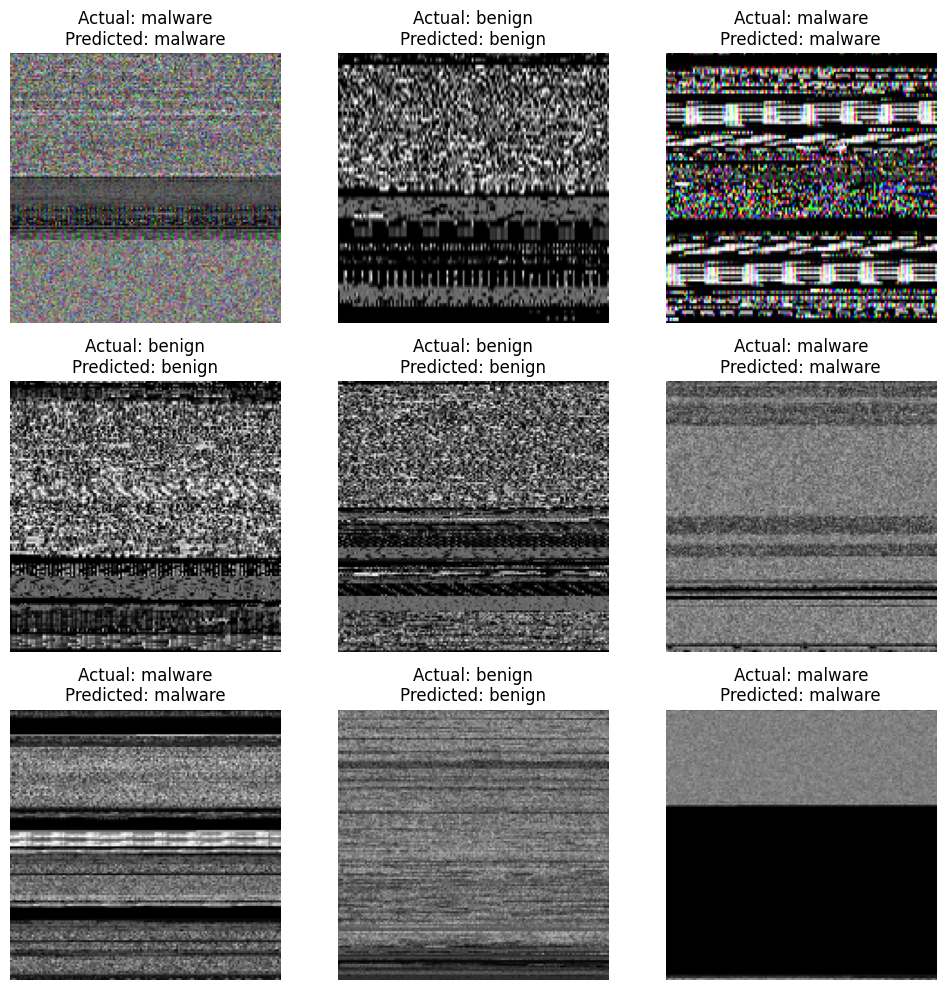

In [16]:
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import matplotlib.pyplot as plt
class_labels = list(test_generator.class_indices.keys())

def get_random_test_images(generator, num_images):
    indices = random.sample(range(len(generator.filenames)), num_images)
    images, labels = [], []
    for idx in indices:
        img_path = os.path.join(generator.directory, generator.filenames[idx])
        img = load_img(img_path, target_size=(150, 150))
        img_array = img_to_array(img)
        img_array /= 255.0
        images.append(img_array)
        labels.append(generator.labels[idx])
    return np.array(images), np.array(labels), indices

num_images = 9
images, labels, indices = get_random_test_images(test_generator, num_images)

predictions = model.predict(images)
predicted_classes = [class_labels[int(pred.flatten()[0] > 0.5)] for pred in predictions]
actual_classes = [class_labels[label] for label in labels]

plt.figure(figsize=(10, 10))
for i in range(num_images):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    plt.title(f'Actual: {actual_classes[i]}\nPredicted: {predicted_classes[i]}')
    plt.axis('off')

plt.tight_layout()
plt.show()